Lasso Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Gradient for Weights

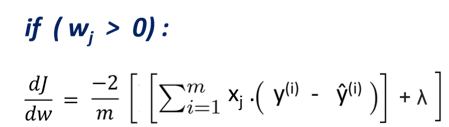

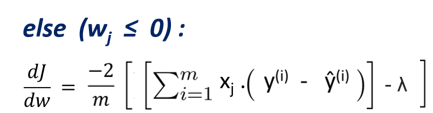

Gradient for Bias

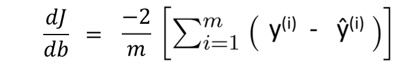

Importing the Dependencies

In [1]:
import numpy as np

Lasso Regression

In [2]:
class Lasso_Regression(): 
    def __init__(self, lr, epochs, lambda_parameter):
        self.lr = lr
        self.epochs = epochs
        self.lambda_parameter = lambda_parameter

    def fit(self, X, y):
        self.num_of_data, self.features = X.shape

        self.W = np.zeros(self.features)
        self.b = 0

        self.X = X
        self.y = y

        for i in range(self.epochs):
            self.update_params()

    def update_params(self):
        y_pred = self.predict(self.X)

        dw = np.zeros(self.features)

        for i in range(self.features):

            if self.W[i]>0:
                dw[i] = (-2/self.num_of_data) * (self.X[:,i].dot(self.y - y_pred) + self.lambda_parameter)
            
            else:
                dw[i] = (-2/self.num_of_data) * (self.X[:,i].dot(self.y - y_pred) - self.lambda_parameter)
        
        db = (-2/self.num_of_data) * (np.sum(self.y - y_pred))

        self.W = self.W - self.lr*dw
        self.b = self.b - self.lr*db

    def predict(self, X):
        return X.dot(self.W) + self.b


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
file = 'salary_data.csv'
data = pd.read_csv(file)
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
# features = data.drop(columns='Salary', axis = 1)
# target = data['Salary']

In [6]:
# features.head()

In [7]:
# target.head()

In [8]:
# scaler = StandardScaler()
# scaler.fit(features)
# X = scaler.transform(features)
# y = target

In [9]:
X = data.iloc[:,:-1].values      
y = data.iloc[:,1].values

In [10]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [11]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 2)

print('=========== Features Shape ===========')
print(X.shape)
print(X_train.shape)
print(X_test.shape,'\n')

print('=========== Target Shape ===========')
print(y.shape)
print(y_train.shape)
print(y_test.shape,'\n')

=========== Features Shape ===========
(30, 1)
(20, 1)
(10, 1) 

=========== Target Shape ===========
(30,)
(20,)
(10,) 



In [13]:
model = Lasso_Regression(lr=0.02, epochs= 1000, lambda_parameter = 200)
model.fit(X_train, y_train)

In [14]:
train_prediction = model.predict(X_train)
train_Rsquare_score = metrics.r2_score(y_train, train_prediction) 
train_MAE_score = metrics.mean_absolute_error(y_train, train_prediction) 

test_prediction = model.predict(X_test)
test_Rsquare_score = metrics.r2_score(y_test, test_prediction) 
test_MAE_score = metrics.mean_absolute_error(y_train, train_prediction) 


print('Score on training datasets')
print(f'R square score: {train_Rsquare_score}')
print(f'MAE score: {train_MAE_score} \n')

print('Score on testing datasets')
print(f'R square score: {test_Rsquare_score}')
print(f'MAE score: {test_MAE_score}')

Score on training datasets
R square score: 0.9716431683203054
MAE score: 3782.0863999353887 

Score on testing datasets
R square score: 0.9041133321176933
MAE score: 3782.0863999353887


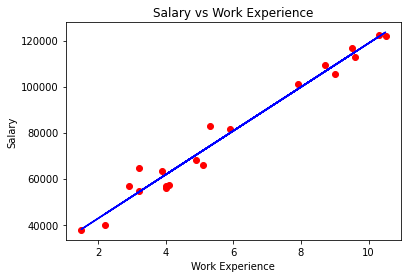

In [15]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, train_prediction, color = "blue")
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Work Experience")
plt.show()

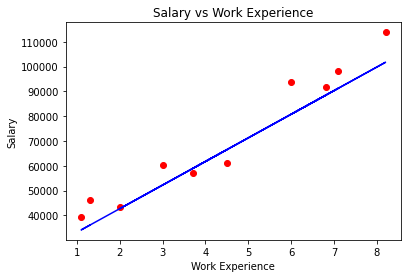

In [16]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, test_prediction, color = "blue")
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Work Experience")
plt.show()